In [1]:
import os
from PySpice.Spice.NgSpice.Shared import NgSpiceShared


try:
    # 强制初始化
    ngspice = NgSpiceShared(ngspice_id=0)
    print("✅ Jupyter 已成功连接到 Ngspice 引擎！")
except Exception as e:
    print(f"❌ 连接失败: {e}")

✅ Jupyter 已成功连接到 Ngspice 引擎！


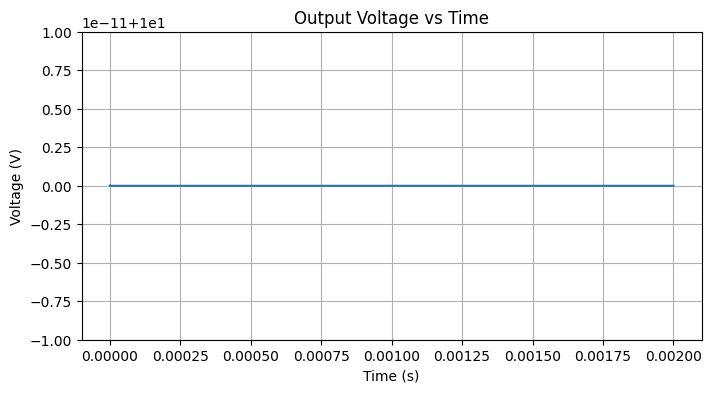

In [3]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import matplotlib.pyplot as plt

# 1. 定义电路
circuit = Circuit('Jupyter Test Circuit')
# 避免使用Python关键字'in'作为节点名，改用'input_node'
circuit.V('input', 'input_node', circuit.gnd, 10@u_V)
circuit.R(1, 'input_node', 'out', 1@u_kOhm)
circuit.C(1, 'out', circuit.gnd, 1@u_uF)

# 2. 仿真配置 - 使用已创建的ngspice实例避免重复初始化错误
simulator = circuit.simulator(temperature=25, nominal_temperature=25, ngspice_shared=ngspice)
analysis = simulator.transient(step_time=1@u_us, end_time=2@u_ms)

# 3. 数据可视化 (Jupyter 的精髓)
plt.figure(figsize=(8, 4))
plt.plot(analysis.time, analysis['out'])
plt.title('Output Voltage vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.show()

In [5]:
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *

# 假设你有一个原始网表字符串
spice_netlist = """
.title Simple RC
V1 input_node 0 10V
R1 input_node out 1k
C1 out 0 1u
.tran 1u 2m
.end
"""

parser = SpiceParser(source=spice_netlist)
circuit = parser.build_circuit()
# 使用已创建的ngspice实例避免重复初始化错误
simulator = circuit.simulator(ngspice_shared=ngspice)
analysis = simulator.transient(step_time=1@u_us, end_time=2@u_ms)

# 访问节点数据
print(f"最大输出电压: {max(analysis.out)} V")

Empty Spice file: None


最大输出电压: 10.0 V V
